# Analyzing Features

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

In [7]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose','diagnosis_tokenized'])
display(df)

,hadm_id,subject_id,expire_flag,diagnosis,admission_type,age,admission_type_encoded,0,1,2,...,c,d,e,f,g,h,i,j,k,l
0,101216,8231,0,PERIPJERAL VASCULAR DISEASE,EMERGENCY,78,1,71.0,247.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,123860,188,0,HEPATIC ENCEPHALOPATHY,EMERGENCY,55,1,160.0,115.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,194053,9965,0,ABDOMINAL PAIN,EMERGENCY,307,1,224.0,214.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,106909,286,0,"ASTHMA, COPD EXACERBATION",EMERGENCY,85,1,200.0,154.0,154.0,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173194,18902,0,"CAD, RENAL FAILURE",EMERGENCY,78,1,114.0,99.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,126769,671,0,SUBARACHNOID HEMORRHAGE,EMERGENCY,47,1,76.0,129.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,117876,357,0,ALTERED MENTAL STATUS,EMERGENCY,64,1,103.0,138.0,149.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,171423,4392,0,BACTEREMIA,EMERGENCY,48,1,197.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,169538,402,0,PULMONARY HYPERTENSION;SYNCOPE,EMERGENCY,49,1,259.0,121.0,234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,120845,263,0,PERIPHERAL INSUFFICIENCY;RIGHT FOOT,EMERGENCY,56,1,130.0,130.0,429.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
overfitting = df.loc[df['expire_flag'] == 1]

df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)

In [9]:
features = df.drop(columns=['hadm_id','subject_id','expire_flag',
                            'diagnosis','admission_type'])
pydf = df.values
print(pydf.shape)
X = pydf[:,5:470]
y = pydf[:,2]

(1042, 469)


# Feature Importance

Feature ranking:
1. feature 0 (0.120392)
2. feature 2 (0.104589)
3. feature 452 (0.081707)
4. feature 3 (0.070589)
5. feature 453 (0.064856)
6. feature 4 (0.054759)
7. feature 5 (0.038704)
8. feature 7 (0.030925)
9. feature 1 (0.030680)
10. feature 454 (0.030499)
11. feature 9 (0.027492)
12. feature 8 (0.026845)
13. feature 6 (0.026694)
14. feature 10 (0.014966)
15. feature 14 (0.014681)
16. feature 16 (0.014324)
17. feature 13 (0.014050)
18. feature 12 (0.014011)
19. feature 11 (0.012183)
20. feature 15 (0.012022)


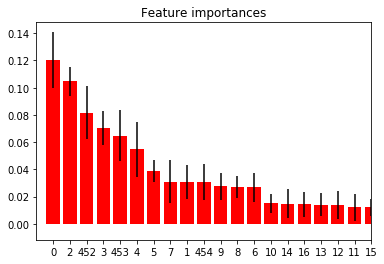

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

XImp = pydf[:,5:470]
yImp = pydf[:,2]
xImp = np.asarray(XImp,dtype=np.float64)
yImp = np.asarray(yImp,dtype=np.float64)
forest = ExtraTreesClassifier()
forest.fit(XImp,yImp)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 19])
plt.show()

# Feature Correlation via Heatmap

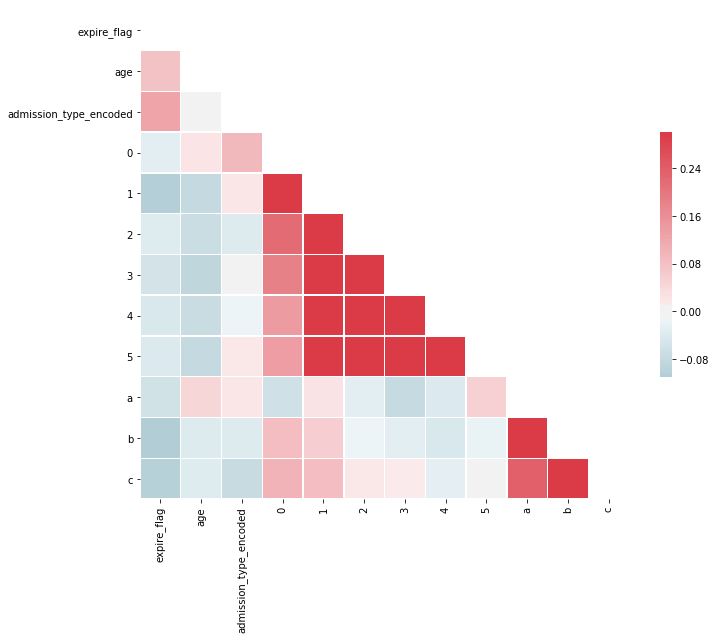

In [11]:
import seaborn as sns
d = df[['expire_flag','age','admission_type_encoded','0','1','2','3','4','5','a','b','c']].copy()
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})